In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval
import glob
from astropy.visualization import ImageNormalize
from matplotlib.patches import Rectangle
import os 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

data_dir = os.getenv("DATADIR")
plt.style.use(data_dir+'bl.mplstyle')

img_hdu = fits.open('example_data/40418_um2_1_1_img.fits')
model_hdu = fits.open('example_data/40418_um2_1_1_model.fits')
wcs = WCS(img_hdu[0].header)
image = img_hdu[0].data
model = model_hdu[0].data

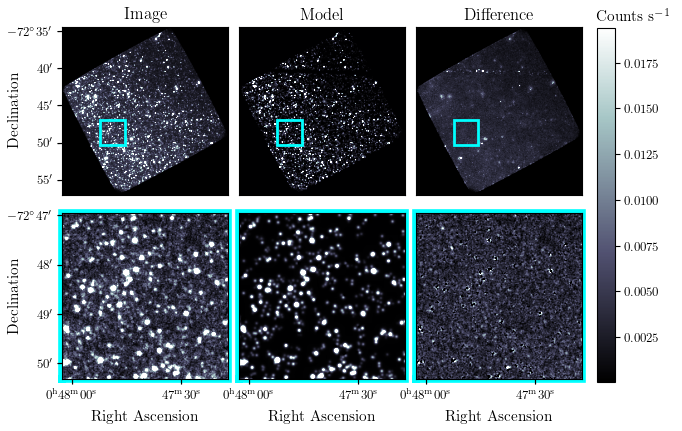

In [3]:

fig = plt.figure(figsize=(3.35*2,3.35*2))
ax = plt.subplot(231, projection=wcs)
bx = plt.subplot(232, projection=wcs)
cx = plt.subplot(233, projection=wcs)
axes = [ax,bx,cx]
# Cmap 
cmap = 'bone'

# Scaling 
xdim = [300,1000]
ydim = [300,1000]
i = np.copy(image)[ydim[0]:ydim[1],xdim[0]:xdim[1]]
interval = ZScaleInterval()
norm = ImageNormalize(i, interval=interval)
# Plot 1: Image 
ax.imshow(image, cmap=cmap, origin='lower', norm=norm)
# Plot 2: Model
bx.imshow(model, cmap=cmap, origin='lower', norm=norm)
# Plot 3: Residuals
c_im = cx.imshow(image-model, cmap=cmap, origin='lower', norm=norm)
# Make a box on the first plot 
xdim = [300,400+100]
ydim = [400,500+100]
boxcolor = 'cyan'
ax.add_patch(Rectangle((xdim[0] - .5, ydim[0] - .5), xdim[1]-xdim[0], ydim[1]-ydim[0], facecolor="none", ec=boxcolor, lw=2))
bx.add_patch(Rectangle((xdim[0] - .5, ydim[0] - .5), xdim[1]-xdim[0], ydim[1]-ydim[0], facecolor="none", ec=boxcolor, lw=2))
cx.add_patch(Rectangle((xdim[0] - .5, ydim[0] - .5), xdim[1]-xdim[0], ydim[1]-ydim[0], facecolor="none", ec=boxcolor, lw=2))
# Second row 
dx = plt.subplot(234, projection=wcs)
ex = plt.subplot(235, projection=wcs)
fx = plt.subplot(236, projection=wcs)
axes = [dx,ex,fx]
# Set xlabel
[ax.set_xlabel('Right Ascension') for ax in axes]
# Set ylabel
[ax.set_ylabel('Declination',labelpad=-0.5) for ax in [ax,dx]]
# Plot 1: Image 
dx.imshow(image, cmap=cmap, origin='lower', norm=norm)
# Plot 2: Model
ex.imshow(model, cmap=cmap, origin='lower', norm=norm)
# Plot 3: Residuals
c_im = fx.imshow(image-model, cmap=cmap, origin='lower', norm=norm)
# Set limits
[ax.set_xlim(xdim) for ax in axes]
[ax.set_ylim(ydim) for ax in axes]
# Take yticks off of the second two columns
for ax_i in [bx,cx,ex,fx]:
    ax_i.coords[1].set_ticks_visible(False)
    ax_i.coords[1].set_ticklabel_visible(False)   
# Have minor ticks only on bottom and left for y 
for ax_i in [ax,dx]:
    ax_i.coords[1].set_ticks_position('bl')
for ax_i in [ax,bx,cx]:
    # Remove plot label from top row 
    ax_i.coords[0].set_ticklabel_visible(False) 
    ax_i.coords[0].set_ticks_visible(False) 
for ax_i in [ax,bx,cx,dx,ex,fx]:
    # Set coordinate tick format
    ax_i.coords[0].set_major_formatter('hh:mm:ss')
    ax_i.coords[1].set_major_formatter('dd:mm')
    # Have minor ticks only on bottom for x
    ax_i.coords[0].set_ticks_position('b')
    # Set tick font
    ax_i.tick_params(axis='both', which='major')#, labelsize=12,fontdict=font)
for ax_i in [dx,ex,fx]:
    # Outline the box
    ax_i.patch.set_edgecolor('cyan')  
    ax_i.patch.set_linewidth(5.5) 
    ax_i.patch.set_joinstyle('miter')
    ax_i.patch.set_capstyle('projecting')

    # Try to space out the ticks
    n=3
    ax_i.coords[0].set_ticks(number=n-1)
    ax_i.coords[1].set_ticks(number=n)
# Colorbar axis 
c_ax = dx.inset_axes([3.5,0.34, 0.2, 1.51]) # [x0, y0, width, height]


# Remove axis border
c_ax.set_xticks([])
c_ax.set_yticks([])
[c_ax.spines[dir].set_visible(False) for dir in ['top','left','bottom','right']]
# Colorbar plot
frac = 1.
plt.colorbar(c_im, ax=c_ax, orientation='vertical',fraction=frac)
# Colorbar title 
c_ax.text(-1.35,1.21, r'Counts s$^{-1}$', size=11, transform=c_ax.transAxes)



# Move suplots closer together
fig.subplots_adjust(wspace=0.07,hspace=-0.44)

# Titles
titlesize = 16+2
ax.set_title('Image')#,size=titlesize)
bx.set_title('Model')#,size=titlesize)
cx.set_title('Difference')#,size=titlesize)

# Save the figure
# This cuts off the figure but you can save in vscode 
# Higher numbers moves it to the right 
#fig.subplots_adjust(left=0.075) 
plt.savefig('tractor_example.png',dpi=1000,bbox_inches='tight')